In [1]:
from fastai.conv_learner import *
from tools.data_wrangling import folders_to_csv

In [2]:
PATH = 'data/plant-seedlings-classification/'
label_csv = os.path.join(PATH, 'labels.csv')
train_path = os.path.join(PATH, 'train')

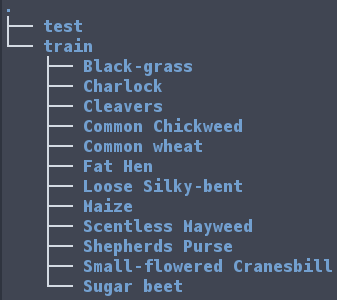

In [3]:
folders_to_csv(train_path, label_csv)

label.csv already exists - exiting


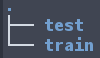

In [4]:
sz = 224
arch = resnet50
bs = 64

In [5]:
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [6]:
def get_data(sz, bs, arch, label_csv):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, test_name='test',
                                        val_idxs=val_idxs, tfms=tfms, bs=bs)
    return data.resize(int(sz*1.3)) if sz > 300 else data.resize(340, 'tmp')

In [8]:
data = get_data(sz, bs, arch, label_csv)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

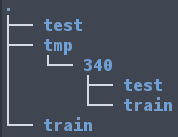